# ###############################################################
# ## Drug Regimen Analysis: ##
# Capomulin and Ramicane have the most number of mouse data per
# timepoint, suggesting a consistent and complete dataset for these regimens.
# Capomulin and Ramicane also show promising results in terms of tumor volume reduction.
# ###############################################################

# ###############################################################
# ## Gender Distribution: ##
# The gender distribution among the mice is relatively balanced, with 51% male and 49% female.
# ###############################################################

# ###############################################################
# ## Capomulin Specific Analysis: ##
# Capomulin demonstrates effectiveness in reducing tumor volume over time.
# The decline in tumor volume becomes noticeable around the 20th day and continues to decrease
# between the 30th and 40th day of treatment.
# ###############################################################

# ###############################################################
# ## Correlation Analysis: ##
# There is a strong positive correlation (0.84) between mouse weight and the average tumor volume.
# This indicates that as the weight of mice increases, the average tumor volume tends to increase as well.
# ###############################################################

# ###############################################################
# ## High-Level Analysis: ##
# - Capomulin and Ramicane: These regimens stand out in terms of both the completeness of data and effectiveness
#   in reducing tumor volume. They may be considered as preferred treatment options.
# - Gender Distribution: The study has a relatively equal distribution of male and female mice, enhancing
#   the generalizability of findings.
# - Capomulin Effectiveness: The observed decline in tumor volume with Capomulin treatment aligns with its
#   reputation as an effective treatment.
# - Correlation between Weight and Tumor Volume: The strong positive correlation between mouse weight and
#   average tumor volume suggests that weight may influence tumor development. Further investigation into
#   this relationship could provide insights into potential factors affecting treatment outcomes.
# ###############################################################

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice in the table
# Identify unique values then count the number of unique values
mouse_id_count = len(combined_df['Mouse ID'].unique())

mouse_id_count

249

In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique 'Mouse ID' values from the duplicated rows
unique_duplicate_ids = duplicate_rows['Mouse ID'].unique()

unique_duplicate_ids

array(['g989'], dtype=object)

In [5]:
# Get all the data for the duplicate mouse ID
All_Data_for_duplicated_ID = combined_df[combined_df['Mouse ID'].isin(unique_duplicate_ids)]

All_Data_for_duplicated_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Identify the ID and place in a variable
duplicate_mouse_id = unique_duplicate_ids[0]

# Set the values in rows with the specified 'Mouse ID' to None
combined_df.loc[combined_df['Mouse ID'] == duplicate_mouse_id, :] = None

# Drop rows with NaN values
cleaned_combined_df = combined_df.dropna()

cleaned_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0.0,45.0,0.0,Capomulin,Female,9.0,22.0
1,f932,0.0,45.0,0.0,Ketapril,Male,15.0,29.0
2,g107,0.0,45.0,0.0,Ketapril,Female,2.0,29.0
3,a457,0.0,45.0,0.0,Ketapril,Female,11.0,30.0
4,c819,0.0,45.0,0.0,Ketapril,Male,21.0,25.0


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mouse_id_count = len(cleaned_combined_df['Mouse ID'].unique())

new_mouse_id_count


248

In [8]:
# Group by 'Drug Regimen'
grouped_df = cleaned_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate mean, median, variance, standard deviation, and SEM
mean = grouped_df.mean()
median = grouped_df.median()
variance = grouped_df.var()
std_deviation = grouped_df.std()
sem = grouped_df.sem()

# Create a summary DataFrame
summary_stats_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_deviation,
    'Tumor Volume Std. Err.': sem
})

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using .agg with a list of aggregation functions
summary_stats_df = cleaned_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    'mean',
    'median',
    'var',
    'std',
    'sem'
])

summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


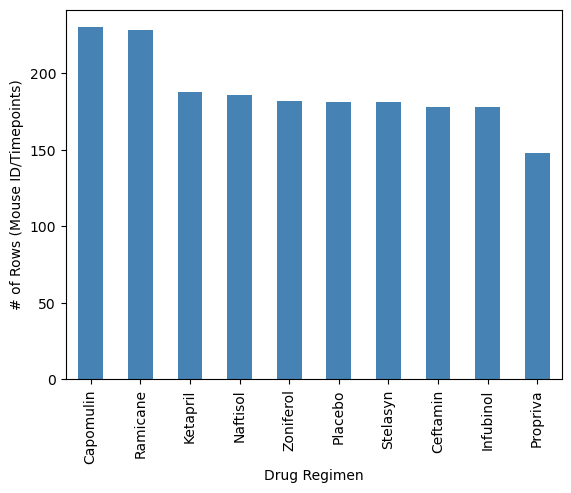

In [10]:
# bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculate the total number of rows for each combination of 'Drug Regimen', 'Mouse ID', and 'Timepoint'
counts_per_combination = cleaned_combined_df.groupby(['Drug Regimen', 'Mouse ID', 'Timepoint']).size().reset_index(name='Total Rows')

# Group by 'Drug Regimen' and sum the total rows, then reset index to get a DataFrame
counts_per_regimen = counts_per_combination.groupby('Drug Regimen')['Total Rows'].sum().reset_index(name='Total Rows')

# Sort the values in descending order
counts_per_regimen = counts_per_regimen.sort_values(by='Total Rows', ascending=False)

# Create a bar plot using Pandas
pd_plot1 = counts_per_regimen.plot(kind='bar', x='Drug Regimen', y='Total Rows', color='steelblue', legend=False)

# Set plot labels and title
pd_plot1.set_xlabel('Drug Regimen')
pd_plot1.set_ylabel('# of Rows (Mouse ID/Timepoints)')

# Display the plot (Not necessary in Jupyter environment, but it won't harm)
plt.show()


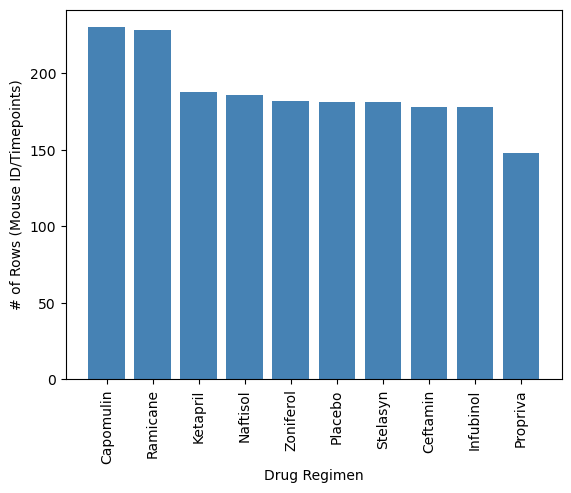

In [11]:
# bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculate the total number of rows for each combination of 'Drug Regimen', 'Mouse ID', and 'Timepoint'
counts_per_combination = cleaned_combined_df.groupby(['Drug Regimen', 'Mouse ID', 'Timepoint']).size().reset_index(name='Total Rows')

# Group by 'Drug Regimen' and sum the total rows, then reset index to get a DataFrame
counts_per_regimen = counts_per_combination.groupby('Drug Regimen')['Total Rows'].sum().reset_index(name='Total Rows')

# Sort the values in descending order
counts_per_regimen = counts_per_regimen.sort_values(by='Total Rows', ascending=False)

# Create a bar plot using Matplotlib pyplot
plt.bar(counts_per_regimen['Drug Regimen'], counts_per_regimen['Total Rows'], color='steelblue')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Rows (Mouse ID/Timepoints)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


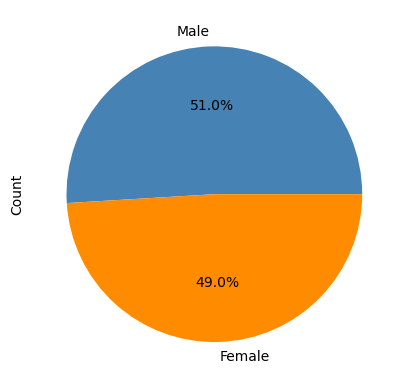

In [12]:
# pie plot showing the distribution of female versus male mice using Pandas
# Count the number of mice for each gender
gender_distribution_df = cleaned_combined_df['Sex'].value_counts().reset_index()

# Rename the columns for clarity
gender_distribution_df.columns = ['Sex', 'Count']

# Set 'Gender' as the index to show desctiption
gender_distribution_df = gender_distribution_df.set_index('Sex')

# Create a pie plot using Pandas dataframe.plot
pd_plot2 = gender_distribution_df.plot.pie(y='Count', autopct='%1.1f%%', colors=['steelblue', 'darkorange'], legend=False)

# Display the plot
plt.show()

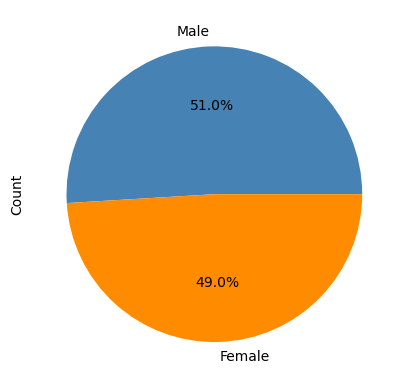

In [13]:
# Count the number of mice for each gender
gender_counts = cleaned_combined_df['Sex'].value_counts()

# Create a pie plot using Pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['steelblue', 'darkorange'])

# Set plot title
plt.ylabel('Count')

# Display the plot
plt.show()

In [74]:
# Identify the last (greatest) timepoint for each mouse
last_timepoints_df = cleaned_combined_df.groupby('Mouse ID')['Timepoint'].max()

# Merge with the original DataFrame to get additional information
final_tumor_volume_df = pd.merge(last_timepoints_df, cleaned_combined_df, on=['Mouse ID', 'Timepoint'], how='left')

# Display the DataFrame with the final tumor volume for each mouse
final_tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45.0,67.973419,2.0,Infubinol,Female,20.0,23.0
1,a251,45.0,65.525743,1.0,Infubinol,Female,21.0,25.0
2,a262,45.0,70.717621,4.0,Placebo,Female,17.0,29.0
3,a275,45.0,62.999356,3.0,Ceftamin,Female,20.0,28.0
4,a366,30.0,63.440686,1.0,Stelasyn,Female,16.0,29.0


In [77]:
# Place the specified drug regimen in a list
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create an empty list to store tumor volume data for plotting
tumor_volume = []

for x in treatment_list:
    # Select the data by filtering. Get the tumor volume if drug regimen is in the treatment list
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == x]['Tumor Volume (mm3)']
    # append to the empty list
    tumor_volume.append(treatment_data)
    # Calculate the IQR for the current treatment
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine the upper and lower bounds for potential outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    # Print the results
    print(f"{x}'s potential outlier: {outliers}")

Capomulin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


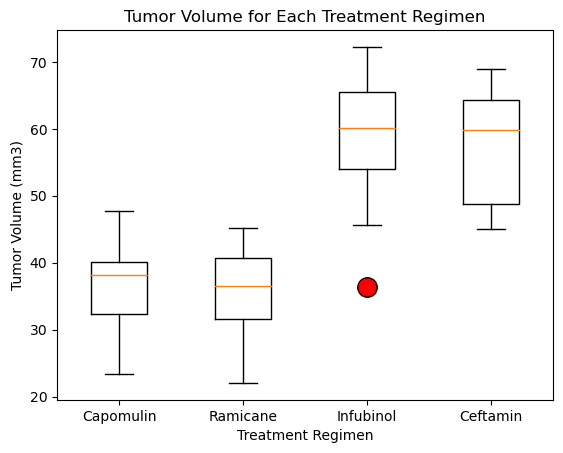

In [80]:
# Box plot for the tumor volume data
flierprops = dict(marker='o', markerfacecolor='red', markersize=14)

plt.boxplot(tumor_volume, labels=treatment_list, flierprops=flierprops)
plt.title('Tumor Volume for Each Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [83]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Identify which Mouse ID is treated with Capomulin

# Filter the DataFrame for Capomulin treatment
capomulin_mice = cleaned_combined_df.loc[cleaned_combined_df['Drug Regimen'] == 'Capomulin', 'Mouse ID'].unique()

# Print the Mouse IDs treated with Capomulin
print("Mouse IDs treated with Capomulin:", capomulin_mice)

Mouse IDs treated with Capomulin: ['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']


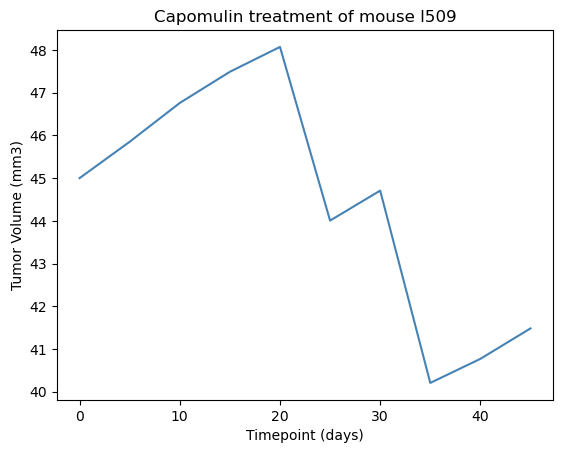

In [105]:
# Pick an ID from the unique list identified
# Called based on list
filtered_capomulin_mice = capomulin_mice[6]

# Filter the DataFrame for the selected mouse ID and Capomulin treatment
selected_mouse_data = cleaned_combined_df[(cleaned_combined_df['Mouse ID'] == filtered_capomulin_mice) & (cleaned_combined_df['Drug Regimen'] == 'Capomulin')]

# Plotting the line plot using the selected mouse data
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], linestyle='-', color='steelblue')

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {filtered_capomulin_mice}')

# Display the plot
plt.show()

In [118]:
# Filter the DataFrame for Capomulin treatment
capomulin_data = cleaned_combined_df[cleaned_combined_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the original DataFrame to include weight
merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID',)

# Print the merged output
merged_data


,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)_y
0,b128,0.0,45.000000,0.0,Capomulin,Female,9.0,22.0,41.963636
1,b128,5.0,45.651331,0.0,Capomulin,Female,9.0,22.0,41.963636
2,b128,10.0,43.270852,0.0,Capomulin,Female,9.0,22.0,41.963636
3,b128,15.0,43.784893,0.0,Capomulin,Female,9.0,22.0,41.963636
4,b128,20.0,42.731552,0.0,Capomulin,Female,9.0,22.0,41.963636
...,...,...,...,...,...,...,...,...,...
225,m601,25.0,33.118756,1.0,Capomulin,Male,22.0,17.0,34.847470
226,m601,30.0,31.758275,1.0,Capomulin,Male,22.0,17.0,34.847470
227,m601,35.0,30.834357,1.0,Capomulin,Male,22.0,17.0,34.847470
228,m601,40.0,31.378045,1.0,Capomulin,Male,22.0,17.0,34.847470


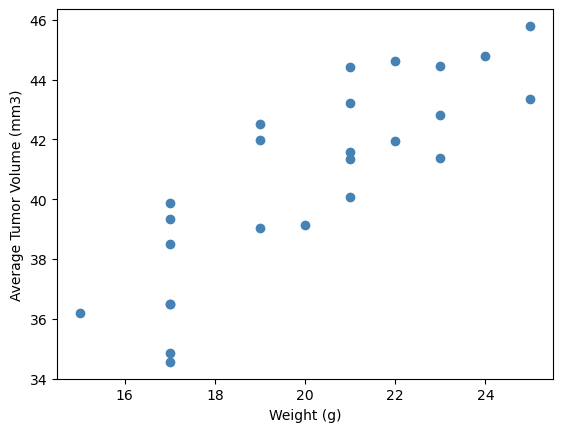

In [120]:

# Rename the tumor volume to proper labels
merged_data.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume (mm3)'}, inplace=True)
merged_data.rename(columns={'Tumor Volume (mm3)_y': 'Average Tumor Volume (mm3)'}, inplace=True)

# Drop duplicate rows to keep only unique mouse data
# Other data not necessary due to the weight and average value being consistent per mouse id
unique_mouse_data = merged_data.drop_duplicates(subset='Mouse ID')

# Create a scatter plot
plt.scatter(unique_mouse_data['Weight (g)'], unique_mouse_data['Average Tumor Volume (mm3)'], color='steelblue')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


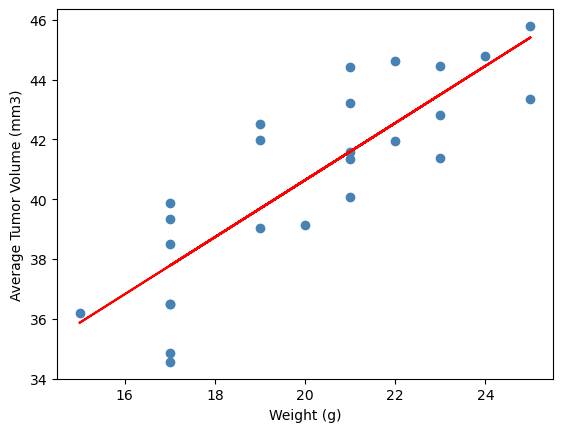

In [143]:
# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(unique_mouse_data['Weight (g)'], unique_mouse_data['Average Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(unique_mouse_data['Weight (g)'], unique_mouse_data['Average Tumor Volume (mm3)'])

# Extracting x and y values from the data
x_values = unique_mouse_data['Weight (g)']
y_values = unique_mouse_data['Average Tumor Volume (mm3)']

# Performing linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

# Calculating the regression values
regress_values = x_values * slope + intercept

# Recycle the scatter plot where linear regression will be placed
plt.scatter(unique_mouse_data['Weight (g)'], unique_mouse_data['Average Tumor Volume (mm3)'], color='steelblue')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plotting the linear regression line
plt.plot(x_values, regress_values, color='red')

# Print the correlation coefficient and show the linear regression model
# Round the value to make the result clean
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient, 2)}')

plt.show()